# Ejercicio1:
 Obtener los siguientes valores de una señal senoidal, una rampa, una onda cuadrada y una señal aleatoria.
1. Valor medio.
2. Maximo.
3. Minimo.
4. Amplitud.
5. Energia.
6. Accion.
7. Potencia media y
8. Raiz del valor cuadratico medio.


Medidas utiles Senoidal: 

Valor medio ->  -1.554312234475219e-16
Maximo ->  0.9510565162951554
Minimo ->  -0.9510565162951563
Amplitud ->  0.9510565162951554
Energia ->  49.999999999999986
Accion ->  -1.554312234475219e-14
Potencia Media ->  0.24999999999999992
RMS ->  0.4999999999999999
Medidas utiles Cuadrada: 

Valor medio ->  0.05
Maximo ->  1.0
Minimo ->  -1.0
Amplitud ->  1.0
Energia ->  80.0
Accion ->  4.0
Potencia Media ->  0.5
RMS ->  0.7071067811865476
Medidas utiles Rampa: 

Valor medio ->  0.49499999999999994
Maximo ->  0.99
Minimo ->  0.0
Amplitud ->  0.99
Energia ->  32.835
Accion ->  49.49999999999999
Potencia Media ->  0.16417500000000002
RMS ->  0.40518514286681345


Text(0, 0.5, 'Amplitud')

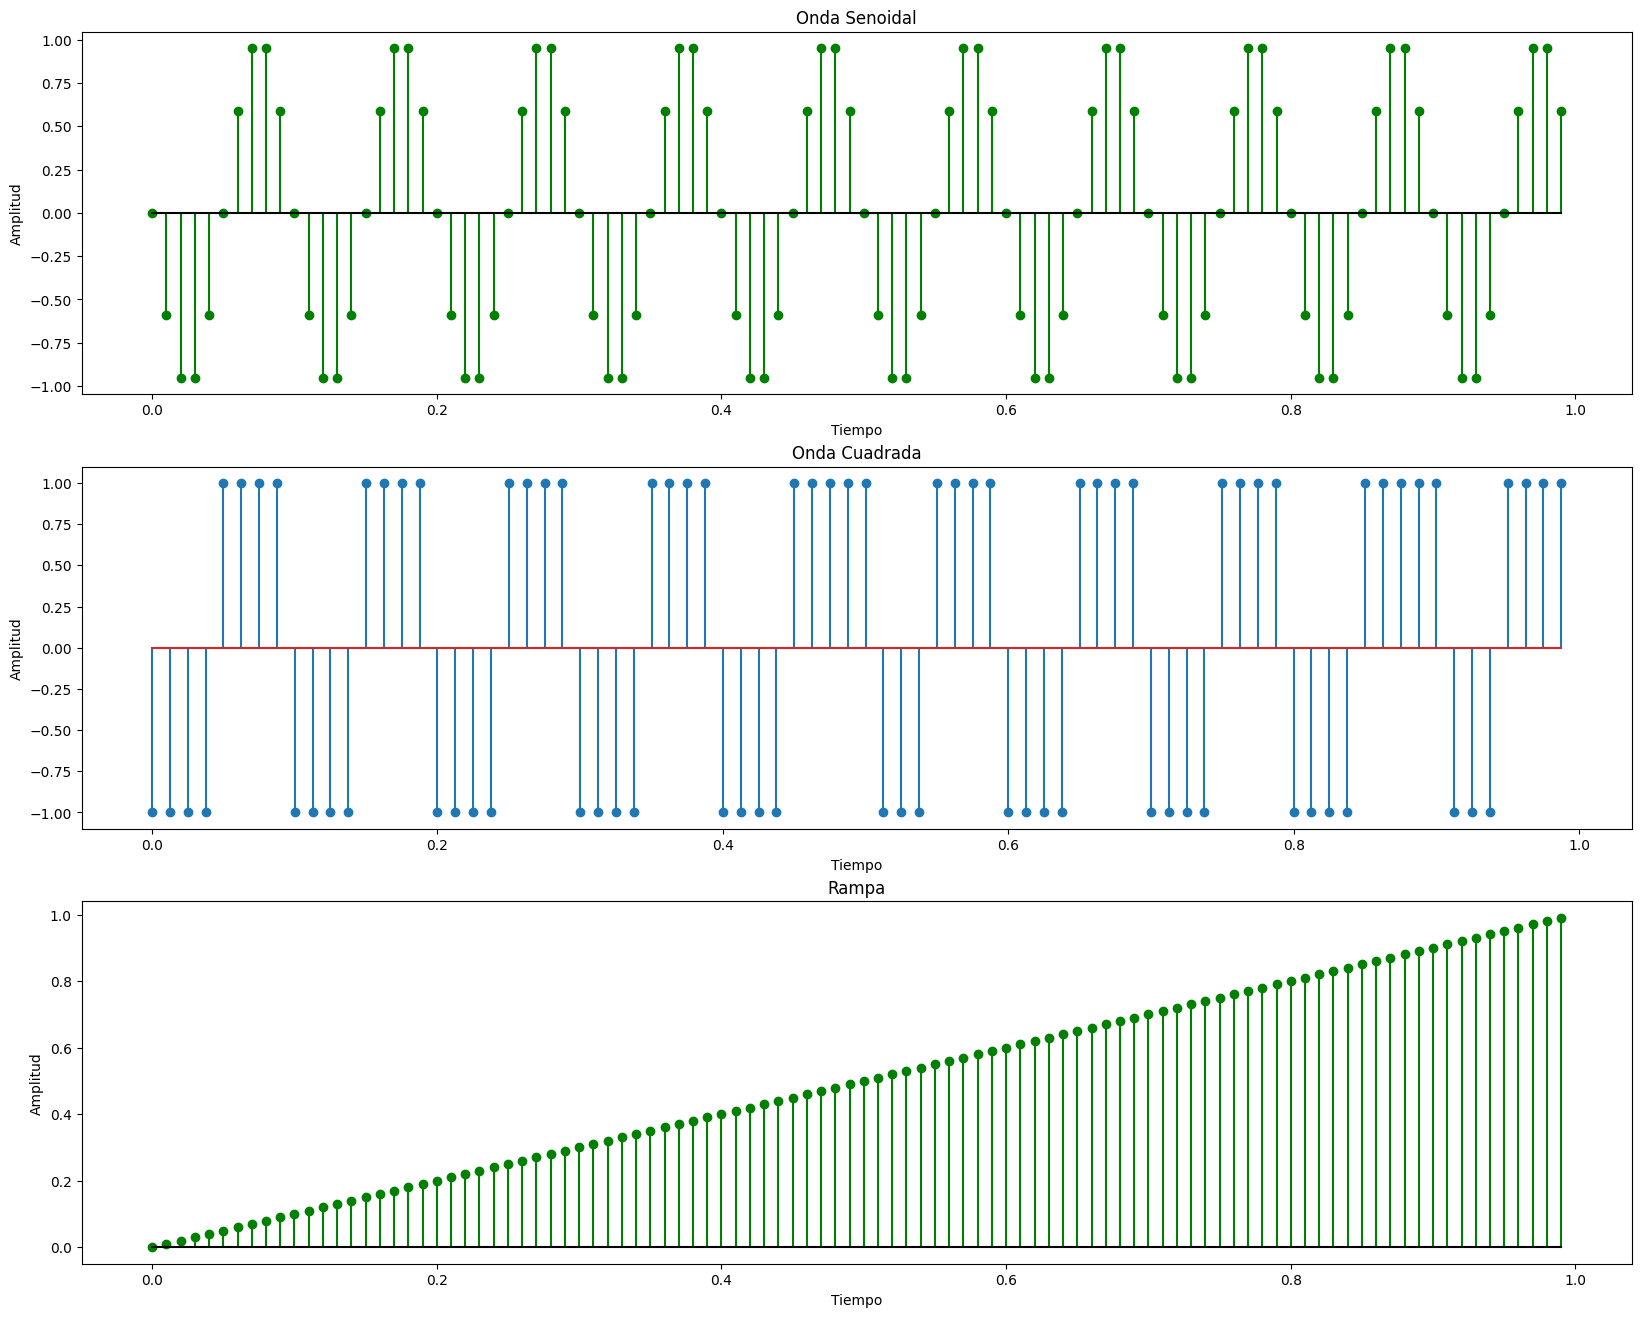

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#==========================================================================================
#==================================IMPLEMENTACION SEÑALES==================================
#==========================================================================================
def senoidal(tiempo_inicial, tiempo_final, frecuencia_senoidal, frecuencia_muestreo, fase):
    Ts = 1 / frecuencia_muestreo 
    t = np.arange(tiempo_inicial, tiempo_final, Ts)  
    y = np.sin(2 * np.pi * frecuencia_senoidal * t + fase)  
    return t, y

def onda_cuadrada(tiempo_inicial, tiempo_final, frecuencia_senoidal, frecuencia_muestreo, fase):
    T = 1/frecuencia_muestreo
    t = np.arange(tiempo_inicial,tiempo_final,T)
    y = np.zeros(len(t))

    for i in range(len(t)):
        if np.mod(2*np.pi*frecuencia_senoidal*t[i] + fase,2*np.pi) >= np.pi:
            y[i] = -1
        else:
            y[i] = 1

    return t, y

def rampa(tiempo_inicial, tiempo_final, paso):
    t = np.arange(tiempo_inicial, tiempo_final, paso)
    y = t * (t >= 0)
    return t, y

#==========================================================================================
#====================================MEDIDAS UTILES========================================
#==========================================================================================
def valor_medio(signal):
    valor_medio = np.average(signal)
    return valor_medio

def maximo(signal):
    return np.max(signal)

def minimo(signal):
    return np.min(signal)

#En el caso de una señal simetrica como la senoidal debe retornar lo mismo que maximo
def amplitud(signal):
    return np.abs(np.max(signal))

def energia(signal):
    energia = 0
    for i in range(len(signal)):
        energia += np.power(signal[i],2)
    return energia

def accion(signal):
    accion = np.sum(signal)
    #accion = 0
    #for i in range(len(signal)):
    #    accion += signal[i]
    return accion

def potencia_media(signal):
    norma = 0
    for i in range(len(signal)):
        norma += np.power(signal[i],2)
    
    pot_media = norma/(2*len(signal))
    return pot_media

def RMS(signal):
    pot = potencia_media(signal)
    RMS = np.sqrt(pot)
    return RMS

tiempo_senoidal, y_senoidal = senoidal(tiempo_inicial=0, tiempo_final=1, frecuencia_senoidal=10, frecuencia_muestreo=100,fase=np.pi)
print("Medidas utiles Senoidal: \n")
print("Valor medio -> ", valor_medio(y_senoidal))
print("Maximo -> ", maximo(y_senoidal))
print("Minimo -> ",minimo(y_senoidal))
print("Amplitud -> ",amplitud(y_senoidal))
print("Energia -> ",energia(y_senoidal))
print("Accion -> ",accion(y_senoidal))
print("Potencia Media -> ",potencia_media(y_senoidal))
print("RMS -> ",RMS(y_senoidal))
print("============================================================================================")

tiempo_cuadrada, y_cuadrada = onda_cuadrada(tiempo_inicial=0, tiempo_final=1, frecuencia_senoidal=10, frecuencia_muestreo=80,fase=np.pi)
print("Medidas utiles Cuadrada: \n")
print("Valor medio -> ", valor_medio(y_cuadrada))
print("Maximo -> ",maximo(y_cuadrada))
print("Minimo -> ",minimo(y_cuadrada))
print("Amplitud -> ",amplitud(y_cuadrada))
print("Energia -> ",energia(y_cuadrada))
print("Accion -> ",accion(y_cuadrada))
print("Potencia Media -> ",potencia_media(y_cuadrada))
print("RMS -> ",RMS(y_cuadrada))

print("============================================================================================")
y_rampa, tiempo_rampa = rampa(tiempo_inicial=0,tiempo_final=1,paso=.010)
print("Medidas utiles Rampa: \n")
print("Valor medio -> ", valor_medio(y_rampa))
print("Maximo -> ",maximo(y_rampa))
print("Minimo -> ",minimo(y_rampa))
print("Amplitud -> ",amplitud(y_rampa))
print("Energia -> ",energia(y_rampa))
print("Accion -> ",accion(y_rampa))
print("Potencia Media -> ",potencia_media(y_rampa))
print("RMS -> ",RMS(y_rampa))

plt.figure(figsize=(20, 16))

plt.subplot(3, 1, 1)
plt.stem(tiempo_senoidal, y_senoidal, linefmt='g-', markerfmt='go', basefmt='k-')
plt.title("Onda Senoidal")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")

plt.subplot(3, 1, 2)
plt.stem(tiempo_cuadrada, y_cuadrada)
plt.title("Onda Cuadrada")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")

plt.subplot(3, 1, 3)
plt.stem(tiempo_rampa, y_rampa, linefmt='g-', markerfmt='go', basefmt='k-')
plt.title("Rampa")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")

# Ejercicio 2
Compruebe que el producto interno mide el grado de parecido entre dos señales dadas. PAra ellos genere señales senoidales y realice el producto interno entre ellas. Evalúe el efecto que producen los distintos parámetros $(A,f,\phi)$ sobre el cálculo del producto interno.

Producto interno iguales:  49.99999999999999
Producto interno distinta frecuencia:  -3.086775000053988e-15
Producto interno distinta fase:  -40.45084971874735


<StemContainer object of 3 artists>

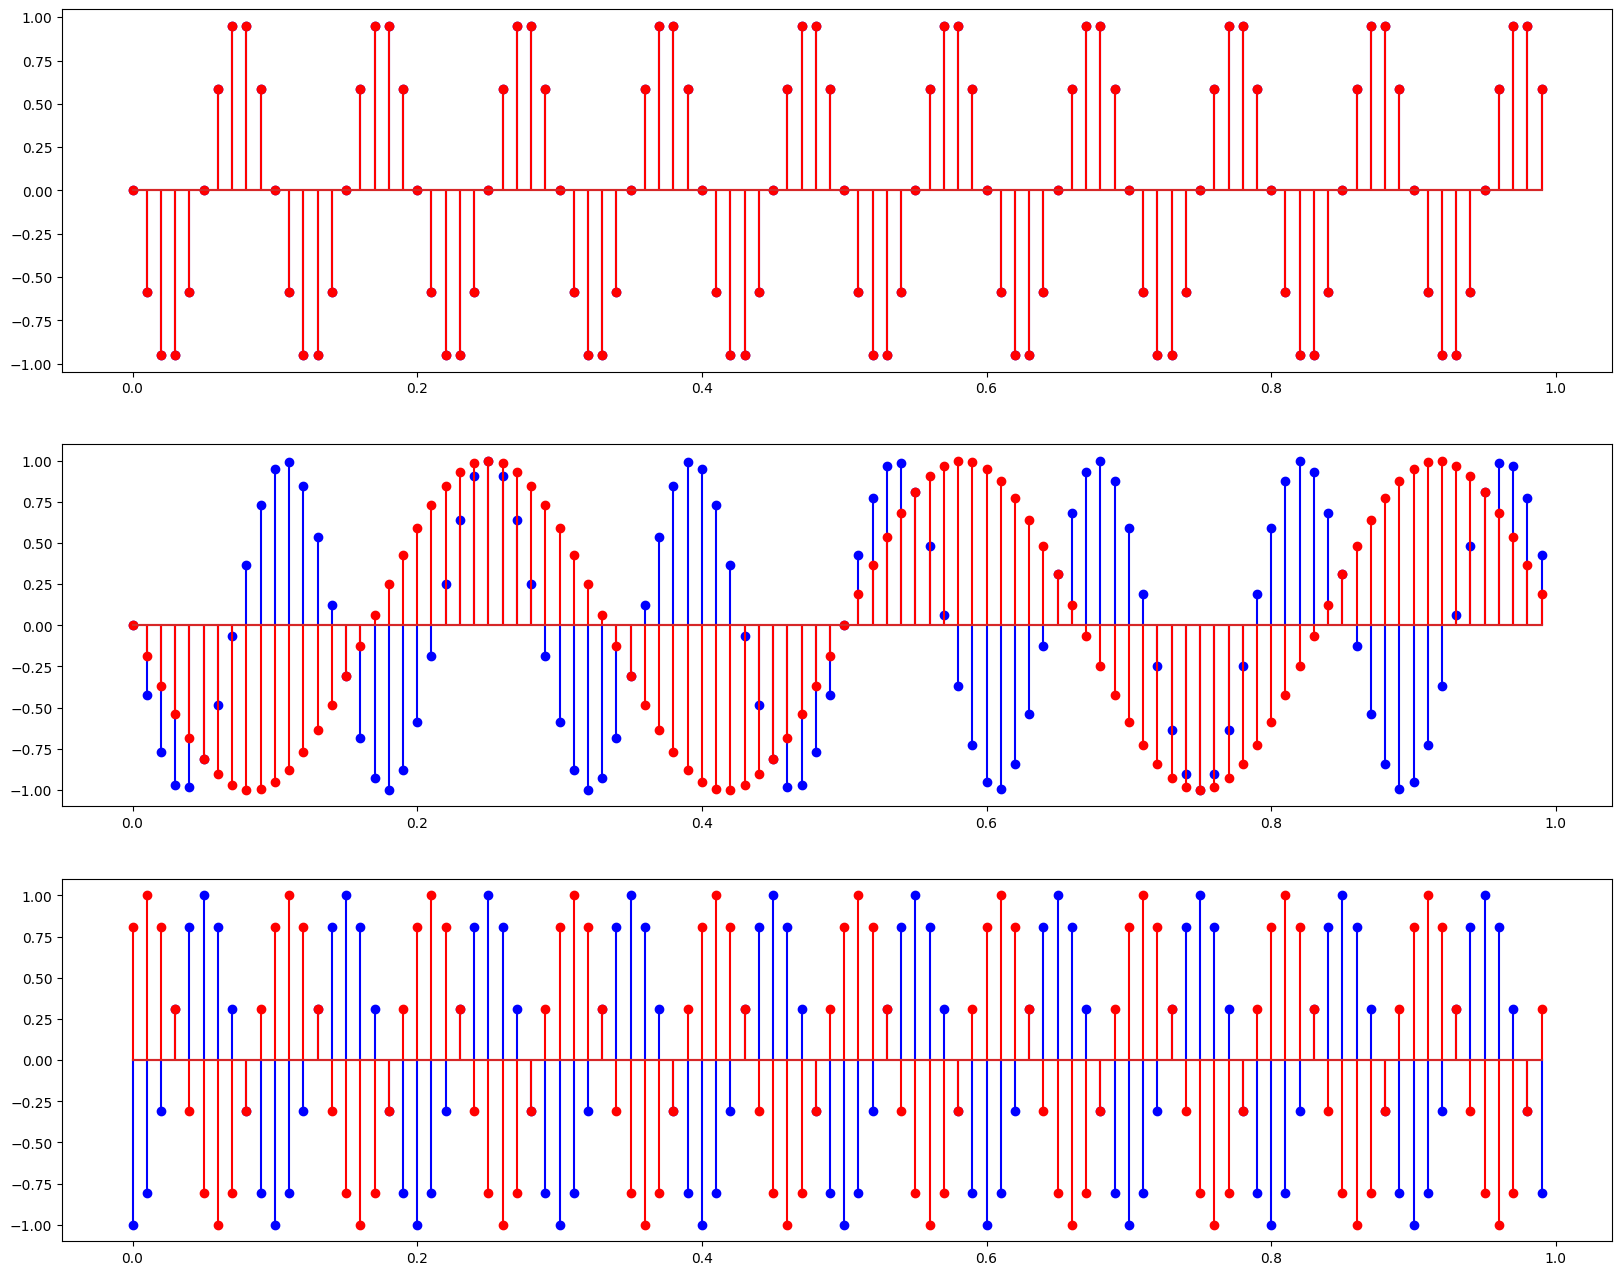

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def producto_interno(signal_a, signal_b):
    return signal_a @ signal_b

#Dos senoidales identicas
tiempo_senoidal1, y_senoidal1 = senoidal(tiempo_inicial=0, tiempo_final=1, frecuencia_senoidal=10, frecuencia_muestreo=100,fase=np.pi)
tiempo_senoidal2, y_senoidal2 = senoidal(tiempo_inicial=0, tiempo_final=1, frecuencia_senoidal=10, frecuencia_muestreo=100,fase=np.pi)
print("Producto interno iguales: ", producto_interno(y_senoidal1,y_senoidal2))

#Dos senoidales con distinta frecuencia
tiempo_senoidal1a, y_senoidal1a = senoidal(tiempo_inicial=0, tiempo_final=1, frecuencia_senoidal=7, frecuencia_muestreo=100,fase=np.pi)
tiempo_senoidal2a, y_senoidal2a = senoidal(tiempo_inicial=0, tiempo_final=1, frecuencia_senoidal=3, frecuencia_muestreo=100,fase=np.pi)
print("Producto interno distinta frecuencia: ",producto_interno(y_senoidal1a,y_senoidal2a))

#Dos senoidales con distinta fase
tiempo_senoidal1b, y_senoidal1b = senoidal(tiempo_inicial=0, tiempo_final=1, frecuencia_senoidal=10, frecuencia_muestreo=100,fase=1.5*np.pi)
tiempo_senoidal2b, y_senoidal2b = senoidal(tiempo_inicial=0, tiempo_final=1, frecuencia_senoidal=10, frecuencia_muestreo=100,fase=2.3*np.pi)
print("Producto interno distinta fase: ",producto_interno(y_senoidal1b,y_senoidal2b))

plt.figure(figsize=(20, 16))

plt.subplot(3, 1, 1)
plt.stem(tiempo_senoidal1, y_senoidal1, 'b-', label='Señal (a)')
plt.stem(tiempo_senoidal2, y_senoidal2, 'r-', label='Señal (b)')

plt.subplot(3, 1, 2)
plt.stem(tiempo_senoidal1a, y_senoidal1a, 'b-', label='Señal (a))')
plt.stem(tiempo_senoidal2a, y_senoidal2a, 'r-', label='Señal (b)')

plt.subplot(3, 1, 3)
plt.stem(tiempo_senoidal1b, y_senoidal1b, 'b-', label='Señal (a))')
plt.stem(tiempo_senoidal2b, y_senoidal2b, 'r-', label='Señal (b)')

<hr>

# Ejercicio 3
Calcule el error cuadrático total de aproximación en el ejemplo con funciones de Legendre bajo las siguientes condiciones: 
1. con los coeficientes calculados en el ejemplo.
2. con pequeñas variaciones en torno a estos coeficientes α, construyendo una gráfica en 3D con la variación en los coeficientes en x,y, y el error cuadrático total en z.
3. con más coeficientes α, para comprobar cómo se reduce el error cuadrático total al aumentar los coeficientes.

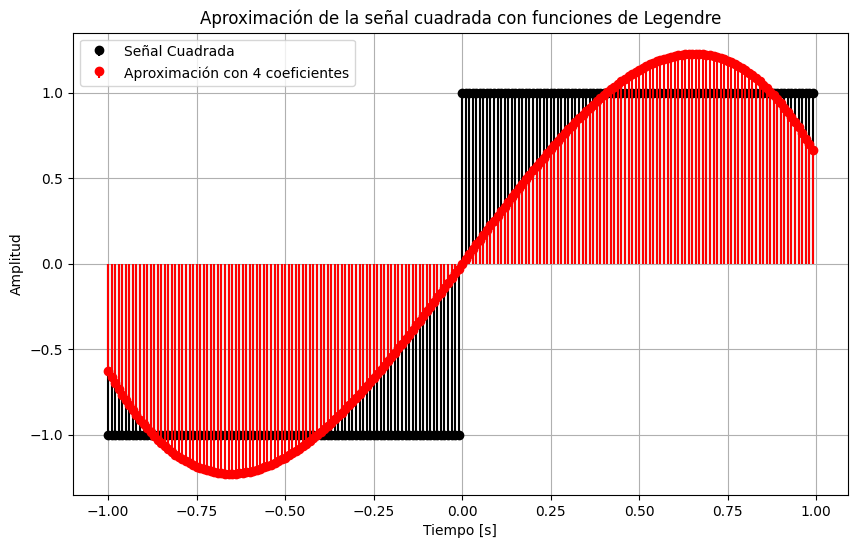

Error cuadrático total con 4 coeficientes: 28.1391
🔍 Mínimo ECM encontrado:
 - Variación en α₁ (índice 1): 1.2247 es igual a 1.2247
 - Variación en α₃ (índice 3): -0.4677 es igual a -0.4677
 - Variación en α₃ (índice 3): -0.4677
 - Error cuadrático medio mínimo: 0.140695


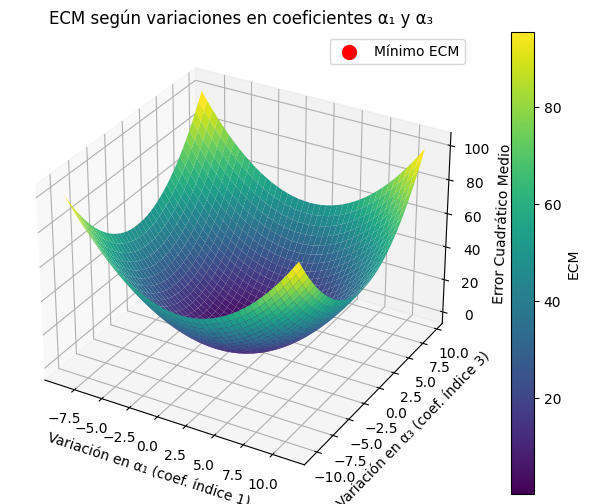

Rango de variaciones aplicadas:
α₁ (coef. índice 1): -10.0 a 10.0
α₃ (coef. índice 3): -10.0 a 10.0

🔍 Mínimo ECM encontrado:
 - Variación en α₁ (índice 1): 1.2247
 - Variación en α₃ (índice 3): -0.4677
 - Error cuadrático medio mínimo: 0.140695


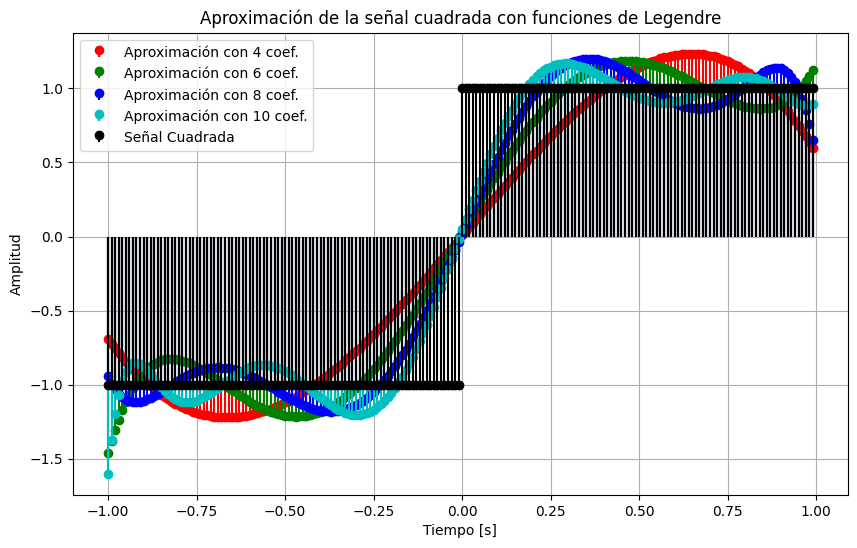

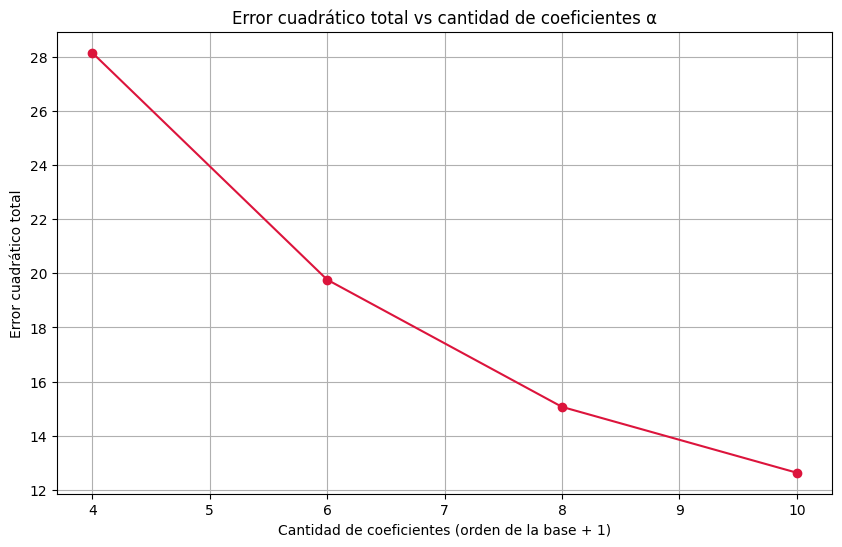

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

def cuadrada(tinicial, tfinal, fs, fm, phi, A):
  t = np.arange(tinicial, tfinal, 1/fm)  # Vector de tiempo
  y = A * np.sign(np.sin(2 * np.pi * fs * t + phi))  # Señal cuadrada
  return t, y

tinicial = -1.0  # Tiempo inicial
tfinal = 1.0  # Tiempo final
fs = 0.5 # Frecuencia de la señal
fm = 100  # Frecuencia de muestreo 
phi = 0.0  # Fase inicial
A = 1.0  # Amplitud de la señal

[t,y] = cuadrada(tinicial, tfinal, fs, fm, phi, A) 
#===============================INCISO 1========================================
##
### FUNCIONES DE LEGENDRE: (pág 62 - Libro de cátedra Señales)
### Funcion de Legendre de phi0 a phi3 evaluadas en t
##%phi_n = [phi0  ,   phi1,   phi2,   phi3];

phi_3 = np.array([np.ones(len(t))*1/np.sqrt(2),
                  np.sqrt(3/2)*t, 
                  np.sqrt(5/2)*((3/2)*t**2- 1/2),
                  np.sqrt(7/2)*((5/2)*t**3 - (3/2)*t)])

### Coeficientes alpha del ejemplo:
alphas3 = np.array([0, np.sqrt(3/2), 0, -np.sqrt(7/32)]) # Coeficientes del ejemplo

y_aprox3 = phi_3.T @ alphas3  # Aproximación de la señal cuadrada

### GRÁFICA
plt.figure(figsize=(10, 6))
plt.stem(t, y,'k-', label='Señal Cuadrada', basefmt=' ')
plt.grid()
plt.stem(t, y_aprox3, 'r-',label='Aproximación con 4 coeficientes', basefmt=' ')
plt.title('Aproximación de la señal cuadrada con funciones de Legendre')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend() 
plt.show()

# Error cuadrático total
error_cuadratico_total3 = np.sum((y - y_aprox3)**2)  # Error cuadrático total
print(f"Error cuadrático total con 4 coeficientes: {error_cuadratico_total3:.4f}")

#================================================================================
#==================================INCISO 2 =====================================
# Variaciones pequeñas en los coeficientes α1 (índice 1) y α3 (índice 3)
variaciones = np.arange(-10, 10 + 0.5, 0.5)  
# Crear malla para las variaciones
X, Y = np.meshgrid(variaciones+alphas3[1], variaciones+alphas3[3])

# Inicializar matriz de errores
error_cuadratico_medioB = np.zeros_like(X, dtype=float)

# Calcular ECM para cada combinación
for i in range(len(variaciones)):
    for j in range(len(variaciones)):
        alphasB = alphas3.copy()
        alphasB[1] = X[i, j]  # Variación en α1
        alphasB[3] = Y[i, j]  # Variación en α3
        y_aproxB = phi_3.T @ alphasB
        error_cuadratico_medioB[i, j] = np.mean((y - y_aproxB) ** 2)  # ECM

# Gráfico 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, error_cuadratico_medioB, cmap='viridis')

ax.set_title('ECM según variaciones en coeficientes α₁ y α₃')
ax.set_xlabel('Variación en α₁ (coef. índice 1)')
ax.set_ylabel('Variación en α₃ (coef. índice 3)')
ax.set_zlabel('Error Cuadrático Medio')

## marcar el mínimo en la gráfica 3D
min_index = np.unravel_index(np.argmin(error_cuadratico_medioB), error_cuadratico_medioB.shape)
min_alpha1_variation = X[min_index]
min_alpha3_variation = Y[min_index]
min_error = error_cuadratico_medioB[min_index]
print(f"🔍 Mínimo ECM encontrado:"
      f"\n - Variación en α₁ (índice 1): {min_alpha1_variation:.4f} es igual a {alphas3[1]:.4f}"
      f"\n - Variación en α₃ (índice 3): {min_alpha3_variation:.4f} es igual a { alphas3[3]:.4f}"
      f"\n - Variación en α₃ (índice 3): {min_alpha3_variation:.4f}"
      f"\n - Error cuadrático medio mínimo: {min_error:.6f}")

ax.scatter(X[min_index], Y[min_index], min_error, color='r', s=100, label='Mínimo ECM')
ax.legend()
fig.colorbar(surf, label='ECM')
plt.show()

print("Rango de variaciones aplicadas:")
print(f"α₁ (coef. índice 1): {variaciones[0]} a {variaciones[-1]}")
print(f"α₃ (coef. índice 3): {variaciones[0]} a {variaciones[-1]}")

# Buscar el índice del mínimo ECM
min_index = np.unravel_index(np.argmin(error_cuadratico_medioB), error_cuadratico_medioB.shape)

# Obtener las variaciones correspondientes
min_alpha1_variation = X[min_index]
min_alpha3_variation = Y[min_index]
min_error = error_cuadratico_medioB[min_index]

print(f"\n🔍 Mínimo ECM encontrado:")
print(f" - Variación en α₁ (índice 1): {min_alpha1_variation:.4f}")
print(f" - Variación en α₃ (índice 3): {min_alpha3_variation:.4f}")
print(f" - Error cuadrático medio mínimo: {min_error:.6f}")

#================================================================================

#================================INCISO 3========================================
# Funciones de Legendre ortonormales hasta orden n
def legendre_ortonormales(n, t):
    from numpy.polynomial.legendre import legval
    phi = []
    for k in range(n+1):
        coef = np.zeros(k+1)
        coef[-1] = 1  # P_k
        Pk = legval(t, coef)
        norm = np.sqrt((2*k + 1)/2)
        phi_k = norm * Pk
        phi.append(phi_k)
    return np.array(phi)

# Parámetros
tinicial = -1.0
tfinal = 1.0
fs = 0.5
fm = 100
phi = 0.0
A = 1.0

t, y = cuadrada(tinicial, tfinal, fs, fm, phi, A)
dt = 1/fm
errores = []
ordenes = range(4,11,2)


plt.figure(figsize=(10, 6))
# Aproximaciones sucesivas
import matplotlib.pyplot as plt
import numpy as np

colores = ['r', 'g', 'b', 'c', 'm', 'y', 'orange', 'purple']

for i, n in enumerate(ordenes):
    phi_n = legendre_ortonormales(n, t)
    alphas_n = np.array([np.sum(y * phi_k) * dt for phi_k in phi_n])
    y_aprox_n = phi_n.T @ alphas_n

    error_n = np.sum((y - y_aprox_n)**2)
    errores.append(error_n)

    color = colores[i % len(colores)] 
    plt.stem(t, y_aprox_n, linefmt=color + '-', markerfmt=color + 'o', basefmt=' ', 
             label=f'Aproximación con {n} coef.')

plt.stem(t, y,'k-', label='Señal Cuadrada', basefmt=' ')
plt.grid()
plt.title('Aproximación de la señal cuadrada con funciones de Legendre')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend() 
plt.show()

# Graficar evolución del error
plt.figure(figsize=(10, 6))
plt.plot(ordenes, errores, 'o-', color='crimson')
plt.title('Error cuadrático total vs cantidad de coeficientes α')
plt.xlabel('Cantidad de coeficientes (orden de la base + 1)')
plt.ylabel('Error cuadrático total')
plt.grid(True)
plt.show()
#================================================================================

<hr>

# Ejercicio 4
Genere una señal como combinacion lineal del conjunto de señales senoidales con frecuencias de 1,2,3,4,5,6,7,8,9 y 10 Hz y luego: 
1. Mida el grado de parecido con dichas senoidales representando el resultado en un grafico de barras.
2. Vuelva a medir el grado de parecido pero con una combinacion lineal en la que se varia la fase de las senoidales.
3. Realice el grafico de barras para el caso de una señal cuadrada de 5.5 Hz

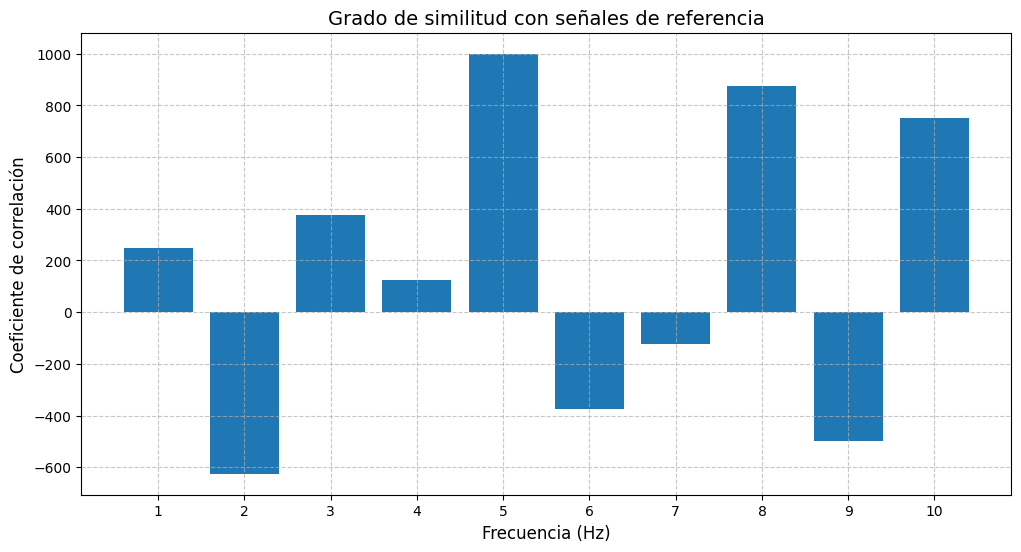

Text(0.5, 1.0, 'Grado de parecido de combinación lineal de senoidales (desfasadas)')

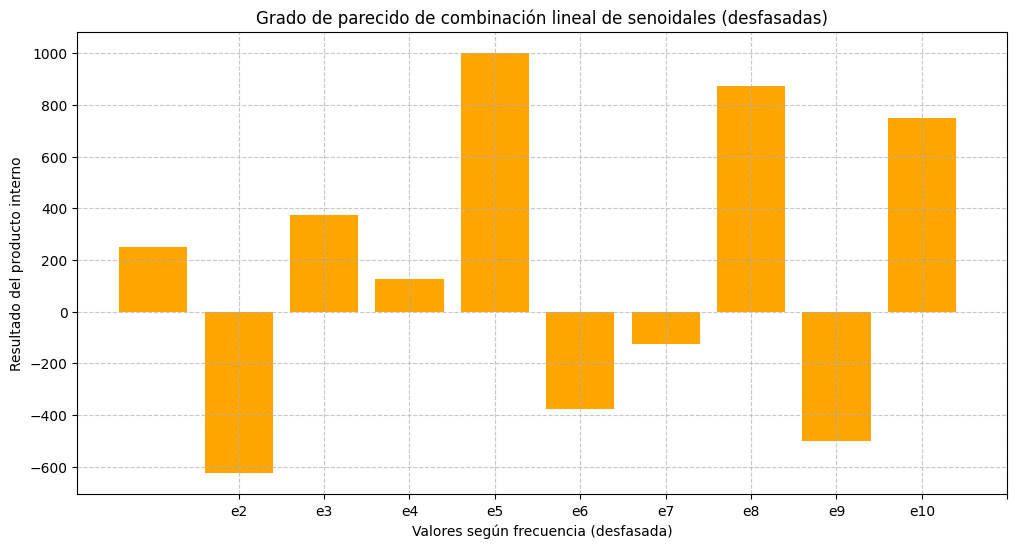

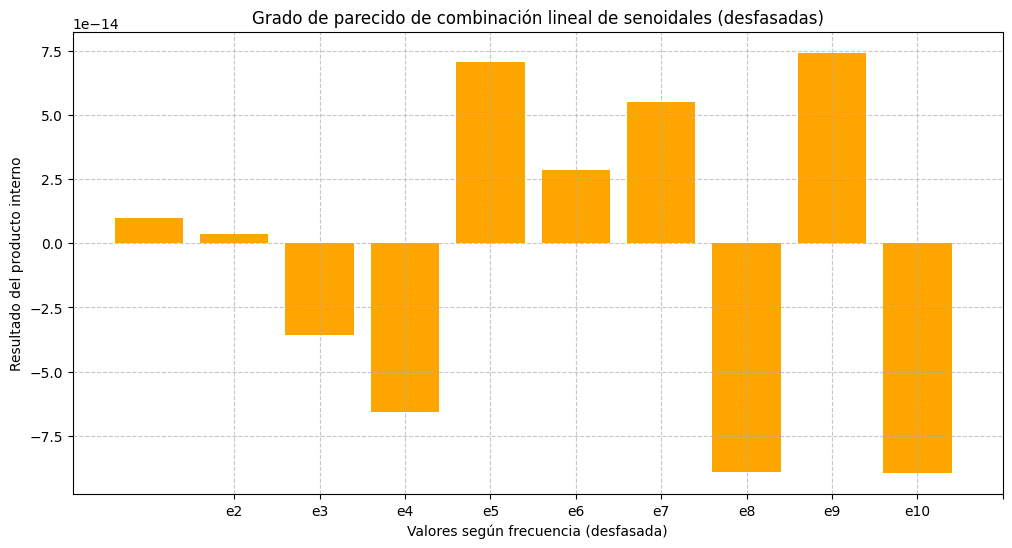

In [5]:
import numpy as np
import matplotlib.pyplot as plt
def senoidal(tiempo_inicial, tiempo_final, frecuencia_senoidal, frecuencia_muestreo, fase):
    Ts = 1 / frecuencia_muestreo 
    t = np.arange(tiempo_inicial, tiempo_final, Ts)  
    y = np.sin(2 * np.pi * frecuencia_senoidal * t + fase)  
    return t, y

def onda_cuadrada(tiempo_inicial, tiempo_final, frecuencia_senoidal, frecuencia_muestreo, fase):
    T = 1/frecuencia_muestreo
    t = np.arange(tiempo_inicial,tiempo_final,T)
    y = np.zeros(len(t))

    for i in range(len(t)):
        if np.mod(2*np.pi*frecuencia_senoidal*t[i] + fase,2*np.pi) >= np.pi:
            y[i] = -1
        else:
            y[i] = 1

    return t, y

def senoidales(phi):
    res = [0]  # Índice 0 no usado (para empezar desde 1)
    ta = 0     # Tiempo inicial
    tb = 5     # Tiempo final
    fm = 50    # Frecuencia de muestreo (Hz)
    
    for i in range(1, 11):
        fs = i  # Frecuencia de la señal (1-10 Hz)
        current_phi = (fs-1)*(np.pi/2) if phi != 0 else 0
        _, aux = senoidal(ta, tb, fs, fm, current_phi)
        res.append(aux)
    return res

def senoidal_compuesta(a, phi):
    sins = senoidales(phi)
    y = np.sum([a[i-1] * sins[i] for i in range(1, 11)], axis=0)
    return y

#==========================================================================================
#=========================================INCISO (A)=======================================
#==========================================================================================

# Coeficientes y cálculo
coeficientes_a = np.array([2, -5, 3, 1, 8, -3, -1, 7, -4, 6])
compuesta = senoidal_compuesta(coeficientes_a, phi=0)
ref = senoidales(0)

#Cálculo de productos internos normalizados
prod_interno = []
for i in range(1, 11):
    # Producto interno normalizado (coeficiente de correlación)
    dot_product =  compuesta@ref[i]
    prod_interno.append(dot_product)

# Visualización
plt.figure(figsize=(12, 6))
plt.bar(range(1, 11), prod_interno)
plt.title("Grado de similitud con señales de referencia", fontsize=14)
plt.xlabel("Frecuencia (Hz)", fontsize=12)
plt.ylabel("Coeficiente de correlación", fontsize=12)
plt.xticks(range(1, 11))
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

#==========================================================================================
#=========================================INCISO (B)=======================================
#==========================================================================================
ref2 = senoidales(np.pi)
prod_interno2 = []
for i in range(1,11):
    prod_interno2.append(compuesta@ref2[i])

x_barras = ['e1','e2','e3','e4','e5','e6','e7','e8','e9','e10']
figure2 = plt.figure(figsize=(12, 6))
plt.bar(x_barras,prod_interno,color='orange') 
plt.xlabel('Valores según frecuencia (desfasada)')
plt.ylabel('Resultado del producto interno')
plt.xticks(range(1, 11))
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Grado de parecido de combinación lineal de senoidales (desfasadas)')

#==========================================================================================
#=========================================INCISO (C)=======================================
#==========================================================================================
_,y3 = onda_cuadrada(tiempo_inicial=0, tiempo_final=5, frecuencia_muestreo=50, frecuencia_senoidal=5.5, fase=0)
prod_interno = []
for i in range(1,11):
    prod_interno.append(y3@ref[i])

x_barras = ['e1','e2','e3','e4','e5','e6','e7','e8','e9','e10']
figure3 = plt.figure(figsize=(12, 6))
plt.bar(x_barras,prod_interno,color='orange') 
plt.xlabel('Valores según frecuencia (desfasada)')
plt.ylabel('Resultado del producto interno')
plt.xticks(range(1, 11))
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Grado de parecido de combinación lineal de senoidales (desfasadas)')

# Ejercicio 5
En el archivo te.txt se encuentra la señal registrada al discar un
numero telefonico en una linea ruidosa y se requiere determinar el numero
que se ha discado. La senal se digitalizo con una frecuencia de muestreo de
11025 Hz y se sabe que cada numero del telefono esta codiﬁcado mediante
la suma de dos senales senoidales cuya frecuencia indica la posicion en el
teclado. De arriba hacia abajo las frecuencias son 697, 770, 852 y 941 Hz; de
izquierda a derecha son 1209, 1336 y 1477 Hz. Por ejemplo: el numero 2 se
codiﬁca con la suma de dos senos con frecuencias 697 y 1336 Hz; el numero
7 se codiﬁca con 852 y 1209 Hz. Se necesita determinar el numero que se ha
discado. (Sugerencia: utilice el producto interno).

98304


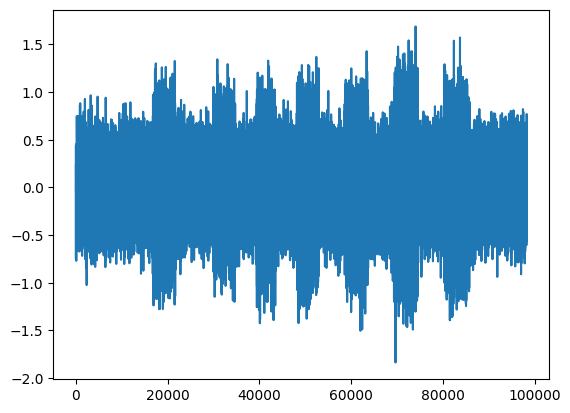

[0] - [1]
[1] - [0] tendria que ser (1,0)
[0] - [1] tendria que ser (0,1)
[2] - [1] tendria que ser (2,1)
[0] - [1] tendria que ser (0,1)
[1] - [2] tendria que ser (1,2)
[1] - [1] tendria que ser (1,1)


In [6]:
import numpy as np
import matplotlib.pyplot as plt
def senoidal(tiempo_inicial, tiempo_final, frecuencia_senoidal, frecuencia_muestreo, fase):
    Ts = 1 / frecuencia_muestreo 
    t = np.arange(tiempo_inicial, tiempo_final, Ts)  
    y = np.sin(2 * np.pi * frecuencia_senoidal * t + fase)  
    return t, y

def decodificacion(datos, frecuencias):
    ta = 0
    frecuencia_muestreo = 11025
    tb = len(datos)/frecuencia_muestreo

    #Chequeo frecuencias y por cada frecuencia chequeo fases.
    mayores_frecuencias = np.zeros(len(frecuencias))
    fases = np.linspace(0,2*np.pi,500)
    size_fases = len(fases)
    for i in np.arange(0,len(frecuencias),1): #En frecuencias mandamos la lista con frecuencias correspondientes a las filas o columnas
        fs = frecuencias[i]
        frecuencias_fase = np.zeros(size_fases)
        for j in np.arange(0,size_fases,1):
            _,sen = senoidal(ta,tb,fs,frecuencia_muestreo,fases[i])
            frecuencias_fase[j] = np.dot(sen,datos)
        mayores_frecuencias[i] = np.max(frecuencias_fase) #Vector con los maximos valores para cada frecuencia
    maximo = np.max(mayores_frecuencias)
    return np.where(mayores_frecuencias == maximo)[0]

datos = np.loadtxt('te.txt')
n = np.arange(0,len(datos),1)
print(len(datos))
plt.plot(n,datos)
plt.show()

frecuencia_signal = 11025
frecuencias_filas = np.array([697,770,852,941])
frecuencias_columnas = np.array([1209, 1336, 1477])

numero1 = datos[17500:21700]
fila1 = decodificacion(numero1, frecuencias_filas)
columna1 = decodificacion(numero1, frecuencias_columnas)
print(fila1, '-', columna1)

numero2 = datos[29600:33700]
fila2 = decodificacion(numero2, frecuencias_filas)
columna2 = decodificacion(numero2, frecuencias_columnas)
print(fila2,'-',columna2,'tendria que ser (1,0)')#(1,0)

numero3 = datos[39700:43400]
fila3 = decodificacion(numero3, frecuencias_filas)
columna3 = decodificacion(numero3, frecuencias_columnas)
print(fila3,'-',columna3,'tendria que ser (0,1)')#(0,1)

numero4 = datos[48000:52700]
fila4 = decodificacion(numero4, frecuencias_filas)
columna4 = decodificacion(numero4, frecuencias_columnas)
print(fila4,'-',columna4,'tendria que ser (2,1)')#(2,1)

numero5 = datos[58500:64000]
fila5 = decodificacion(numero5, frecuencias_filas)
columna5 = decodificacion(numero5, frecuencias_columnas)
print(fila5,'-',columna5,'tendria que ser (0,1)')#()

numero6 = datos[69900:75000]
fila6 = decodificacion(numero6, frecuencias_filas)
columna6 = decodificacion(numero6, frecuencias_columnas)
print(fila6,'-',columna6,'tendria que ser (1,2)')#

numero7 = datos[79000:85900]
fila7 = decodificacion(numero7, frecuencias_filas)
columna7 = decodificacion(numero7, frecuencias_columnas)
print(fila7,'-',columna7,'tendria que ser (1,1)')#

# Ejercicio 6
En el archivo *escala.wav* se encuentran almacenados ocho tonos puros *(notas musicales)* sin separacion, cada uno con una duracion de 0.5 segundos de duracion. Implemente un algoritmo para detectar el momento donde se encuentra la nota LA.

# Conclusiones
Este ejercicio parte de una idea clave en PDS como lo es que una señal discreta puede verse como un vector en un espacio vectorial de señales
- Cada bloque de 0.5s del audio es un vector de $x \in R^N$
- Podemos proyectar ese vector sobre una base (una senoidal) para ver cuanto de esa componente tiene en esa direccion.

### Producto interno como medida de parecido
Para saber si un bloque contiene una nota de 440 Hz, se mide el parecido con una senoidal de 440 Hz usando el producto interno

$$ <x,S_{440}> = \sum_{n = 0}^{N-1} x[n].sin(2\pi.440.\frac{n}{f_s})$$

- Esto se interpreta como una proyeccion de la señal sobre la base senoidal
- El valor de esa proyeccion es grande si la nota esta presente en ese bloque

La energia se calcula como: $E = (<x,S_{440}>)^2$

## Division en bloques: 
Para poder identificar cuando es que ocurre la nota, la señal total esta dividida en bloques de 0.5 segundos $N_{bloque} = f_s 0.5$
Asi cada bloque representa una nota distinta y podemos analizar independientemente

## Umbral relativo
Como los tonos son puros, se espera que uno de ellos tenga una energia significativamente mayor que los demas en 440Hz.
Por eso aplicamos un umbral relativo para decidir que bloques tienen la nota.

## Por que este enfoque? 
- Termina siendo mas efectivo ya que usamos directamente el producto interno con una sola frecuencia.
- Basado en teoria de espacios vectoriales
- El producto interno como detector: Si la señal tiene una componente en la direccion de la base (senoidal de 440 hz), el producto interno sera alto -> Hay nota LA

*en este ejercicio aplicamos espacio de señales, producto interno como detector de patrones, proyeccion sobre bases ortogonales en una situacion practica y concreta*


--- Energías detectadas ---
Bloque 1 – Energía a 440 Hz: 3135130375.28
Bloque 2 – Energía a 440 Hz: 6271056759817808.00
Bloque 3 – Energía a 440 Hz: 12300221780.52
Bloque 4 – Energía a 440 Hz: 1915591082.38
Bloque 5 – Energía a 440 Hz: 988969185.68
Bloque 6 – Energía a 440 Hz: 1048336216.50
Bloque 7 – Energía a 440 Hz: 3373481005.52
Bloque 8 – Energía a 440 Hz: 376383373265.29

--- Notas detectadas ---
✅ Nota LA detectada en el instante 0.50 s


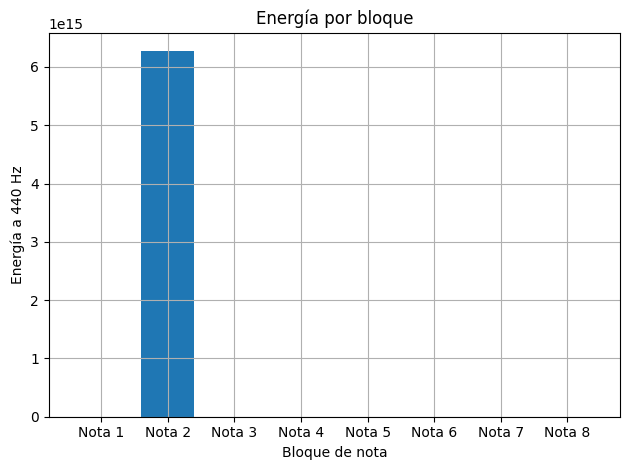

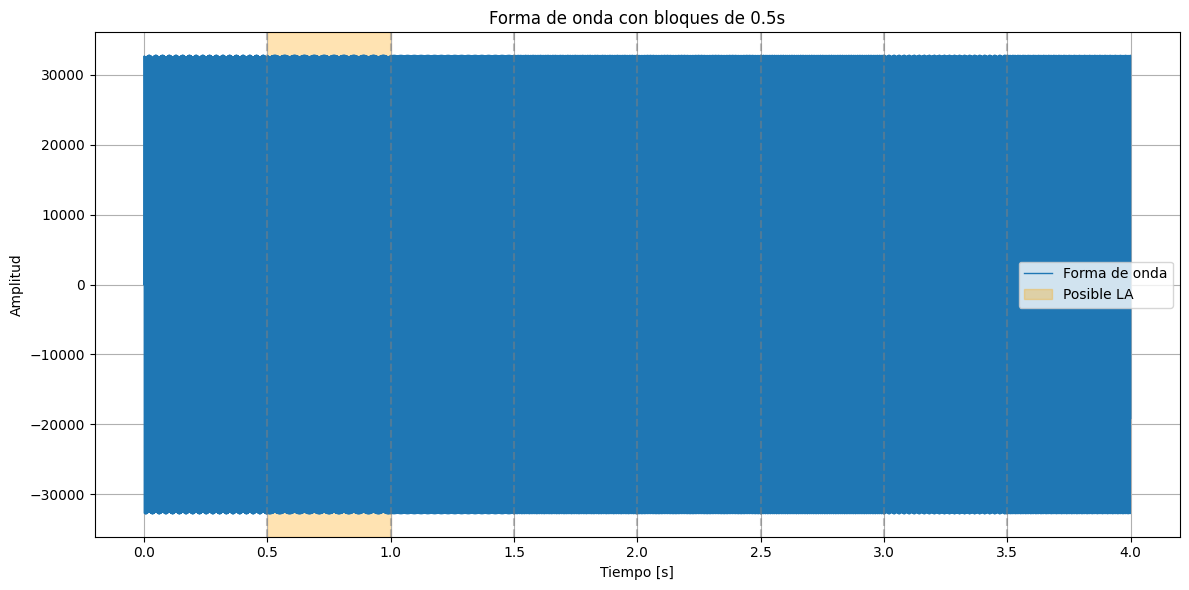

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# -------------------------- CONFIGURACIÓN --------------------------
DURATION = 0.5  # Duración de cada bloque de nota en segundos
FREQ_TARGET = 440  # Frecuencia a detectar (Hz)
WAV_PATH = 'C:/Users/Acer/OneDrive/Desktop/Ejercicio 6/escala.wav' #Ruta del archivo WAV


# -------------------------- FUNCIONES --------------------------
def leer_audio(path):
    """Lee un archivo WAV y retorna: 
    -Simple_rate: frecuencia de muestreo
    -data: señal en mono
    """
    sample_rate, data = wavfile.read(path)      #Lee el archivo de audio
    if len(data.shape) > 1:                     #Si es estéreo
        data = data[:, 0]                       #Se queda con un solo canal [mono]
    return sample_rate, data


def dividir_en_segmentos(data, sample_rate, duration):
    """Divide la señal en bloques de duración fija.
    
        Retorna una lista de segmentos de audio"""
    samples_por_bloque = int(sample_rate * duration)            #Cantidad de muestras por bloque
    bloques = [
        data[i * samples_por_bloque:(i + 1) * samples_por_bloque]
        for i in range(len(data) // samples_por_bloque)
    ]
    return bloques


def energia_senoidal(segmento, sample_rate, freq):
    """Calcula la energia de un segmento respecto de una onda senoidal
    de referencia con la frecuencia especificada (freq)."""
    t = np.arange(len(segmento)) / sample_rate  #Vector de tiempos
    seno_ref = np.sin(2 * np.pi * freq * t)     #Señal senoidal de referencia
    energia = np.dot(segmento, seno_ref) ** 2   #Energia
    return energia


def detectar_notas(energias, threshold_ratio=0.5):
    """
    Detecta los bloques donde la energia supera un umbral relativo 
    (Por defecto 50% del maximo).

    Retorna una lista con los indices de los bloques que superan el umbral
    """
    max_energy = max(energias)
    return [i for i, e in enumerate(energias) if e > threshold_ratio * max_energy]


def graficar_barras(energias):
    """Grafica un diagrama de barras con la energia calculada por bloque."""
    plt.bar(range(1, len(energias) + 1), energias)
    plt.xticks(range(1, len(energias) + 1), [f'Nota {i}' for i in range(1, len(energias) + 1)])
    plt.xlabel('Bloque de nota')
    plt.ylabel(f'Energía a {FREQ_TARGET} Hz')
    plt.title('Energía por bloque')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def graficar_onda(data, sample_rate, duration, notas_detectadas):
    """Grafica la forma de onda del audio completo y marca:
        -Lineas divisorias por bloque
        -Zonas con nota LA detectada"""
    tiempo = np.linspace(0, len(data) / sample_rate, len(data)) #Vector de tiempo total
    plt.figure(figsize=(12, 6))
    plt.plot(tiempo, data, label='Forma de onda', linewidth=1)

    # Lineas divisorias entre bloques
    for i in range(1, int(len(data) / (sample_rate * duration))):
        plt.axvline(x=i * duration, color='gray', linestyle='--', alpha=0.5)

    # Resaltado de bloques con nota detectada
    for i in notas_detectadas:
        plt.axvspan(i * duration, (i + 1) * duration, color='orange', alpha=0.3,
                    label='Posible LA' if i == notas_detectadas[0] else "")

    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud')
    plt.title('Forma de onda con bloques de 0.5s')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# -------------------------- EJECUCIÓN PRINCIPAL --------------------------
def main():
    #Cargar audio y convertirlo a mono si es necesario
    sample_rate, data = leer_audio(WAV_PATH)

    #Dividir la señal en bloques de 0.5 segundos
    bloques = dividir_en_segmentos(data, sample_rate, DURATION)

    #Calcular la energia en 440Hz para cada bloque
    energias = [energia_senoidal(bloque, sample_rate, FREQ_TARGET) for bloque in bloques]

    #Mostramos energias detectadas
    print("\n--- Energías detectadas ---")
    for i, e in enumerate(energias):
        print(f"Bloque {i+1} – Energía a {FREQ_TARGET} Hz: {e:.2f}")

    #Detectar en que bloques hay una nota LA (basado en el umbral)
    notas_detectadas = detectar_notas(energias)
    print("\n--- Notas detectadas ---")
    for i in notas_detectadas:
        print(f"✅ Nota LA detectada en el instante {i * DURATION:.2f} s")

    #Visualizaciones
    graficar_barras(energias)
    graficar_onda(data, sample_rate, DURATION, notas_detectadas)


if __name__ == "__main__":
    main()